In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as ts
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report


In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [13]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32)


Epoch 1/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3722 - accuracy: 0.8666
Epoch 2/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2471 - accuracy: 0.9100
Epoch 3/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2055 - accuracy: 0.9247
Epoch 4/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1731 - accuracy: 0.9359
Epoch 5/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1441 - accuracy: 0.9462
Epoch 6/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1244 - accuracy: 0.9540
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1044 - accuracy: 0.9615
Epoch 8/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0891 - accuracy: 0.9671
Epoch 9/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0747 - accuracy: 0.9732
Epoch 10/15
1875/1875 [==============================] - 22s 12m

In [15]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4485 - accuracy: 0.9100


In [16]:
print("Train accuracy:", round(train_acc, 5))
print("Train loss:", round(train_loss, ))
print("Test accuracy:", round(test_acc, 5))
print("Test loss:", round(test_loss, 3))

Train accuracy: 0.98888
Train loss: 0
Test accuracy: 0.91
Test loss: 0.449


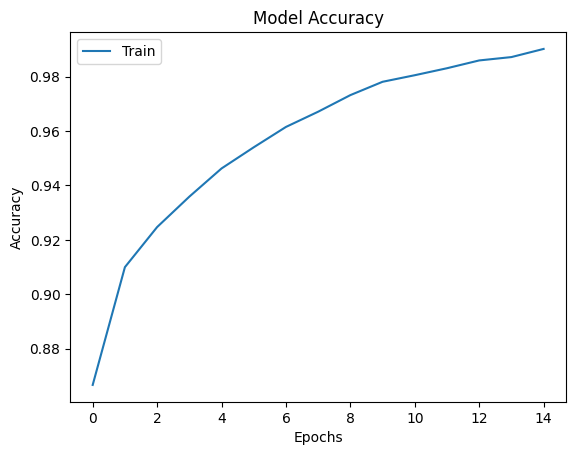

In [17]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()